In [1]:
%pwd

'C:\\Users\\Rose Garden Inn\\Cricket Data'

In [2]:
## Loading Imporatant Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_country=pd.read_csv('C:\\Users\\Rose Garden Inn\\Cricket Data\\countries_list.csv')
df_matches=pd.read_csv('C:\\Users\\Rose Garden Inn\\Cricket Data\\file_cricket.csv')


In [6]:
df_country
df_matches

,Unnamed: 0,Index,Date,Series,Ground,result
0,0,1,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
1,1,2,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
2,2,3,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
3,3,4,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
4,4,5,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets
...,...,...,...,...,...,...
988,988,989,29/11/2020,2020-2021 Australia v. India,Sydney Cricket Ground,Australia won by 51 runs
989,989,990,02/12/2020,2020-2021 Australia v. India,Manuka Oval,India won by 13 runs
990,990,991,23/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 66 runs
991,991,992,26/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets


In [71]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  993 non-null    int64 
 1   Index       993 non-null    int64 
 2   Date        993 non-null    object
 3   Series      993 non-null    object
 4   Ground      993 non-null    object
 5   result      993 non-null    object
 6   Verdict     993 non-null    object
dtypes: int64(2), object(5)
memory usage: 54.4+ KB


### Here we are adding  India column  which shows match results such as  won, lost and draw.

In [247]:
condtions=[(df_matches['result'].str.contains('India won')),(df_matches['result'].str.contains('No Result'))
           ,(df_matches['result'].str.contains('Match Tied')),
            ~(df_matches['result'].str.contains('India won'))]
values=['Won','No result','Tied','Lost']                                                             

In [248]:
df_matches['India']=np.select(condtions,values)

In [253]:
df_matches['India'].value_counts()

Won          516
Lost         427
No result     41
Tied           9
Name: India, dtype: int64

In [254]:
print('India play total no of matches =',df_matches['India'].value_counts().sum())
print('India won total no of matches =',df_matches['India'].value_counts()[0])
print('India loss total no of matches =',df_matches['India'].value_counts()[1])
print('No Results matches =',df_matches['India'].value_counts()[2])
print('Drwan matches =',df_matches['India'].value_counts()[3])

India play total no of matches = 993
India won total no of matches = 516
India loss total no of matches = 427
No Results matches = 41
Drwan matches = 9


C:\Users\Rose Garden Inn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of Matchs')

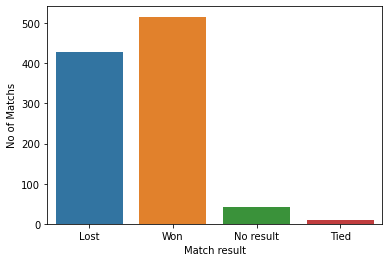

In [259]:
sns.countplot(df_matches['India']);
plt.xlabel('Match result')
plt.ylabel('No of Matchs')

###  Lets Add column showing that who win by batting first:


In [260]:
df_matches['Country_won']=df_matches['result'].str.split('won',expand=True)[0]

In [270]:
df_matches['result']

0          England won by 4 wickets
1          England won by 6 wickets
2           England won by 202 runs
3           India won by 10 wickets
4      New Zealand won by 4 wickets
                   ...             
988        Australia won by 51 runs
989            India won by 13 runs
990            India won by 66 runs
991        England won by 6 wickets
992             India won by 7 runs
Name: result, Length: 993, dtype: object

In [279]:
conditions=[(df_matches['result'].str.contains('wickets')),(df_matches['result'].str.contains('No Result')),
            (df_matches['result'].str.contains('Match')),
           ~(df_matches['result'].str.contains('wickets'))]
values=['Bowl_First','None','Drawn','Bat_First']
df_matches['Bat_or_Bowl_First']=np.select(conditions,values)

In [282]:
df_matches['Bat_or_Bowl_First'].value_counts()

Bowl_First    492
Bat_First     451
None           41
Drawn           9
Name: Bat_or_Bowl_First, dtype: int64

In [283]:
df_bat_first=df_matches[df_matches['Bat_or_Bowl_First']=='Bat_First']['Country_won'].value_counts().to_frame()
df_bat_first.reset_index(inplace=True)
df_bat_first=df_bat_first.rename(columns={'index':'Country','Country_won':'bat_win'})
df_bat_first=df_bat_first.sort_values(by='bat_win',ascending=False)


In [284]:
df_bowl_first=df_matches[df_matches['Bat_or_Bowl_First']=='Bowl_First']['Country_won'].value_counts().to_frame()
df_bowl_first.reset_index(inplace=True)
df_bowl_first=df_bowl_first.rename(columns={'index':'Country','Country_won':'bowl_win'})
df_bowl_first=df_bowl_first.sort_values(by='bowl_win',ascending=False)
df_bowl_first
df_bat_bowl_win=pd.merge(df_bat_first,df_bowl_first)
df_bat_bowl_win['Total_win']=df_bat_bowl_win['bat_win']+df_bat_bowl_win['bowl_win']
df_bat_bowl_win

,Country,bat_win,bowl_win,Total_win
0,India,232,284,516
1,Australia,46,34,80
2,Pakistan,43,30,73
3,West Indies,30,33,63
4,Sri Lanka,27,29,56
5,South Africa,22,24,46
6,New Zealand,22,27,49
7,England,20,23,43
8,Zimbabwe,5,5,10
9,Bangladesh,2,3,5


In [303]:
df_matches['Country_won']=df_matches['Country_won'].str.strip()
df_matches['Country_won'].value_counts()

India           516
Australia        80
Pakistan         73
West Indies      63
Sri Lanka        56
New Zealand      49
South Africa     46
England          43
No Result        41
Zimbabwe         10
Match Tied        9
Bangladesh        5
Kenya             2
Name: Country_won, dtype: int64

###  Which Ground managed to produce maximum wins to India?

In [310]:
df_matches[df_matches['Country_won']=='India']['Ground'].value_counts()[:6].to_frame()

,Ground
Sharjah Cricket Stadium,35
R Premadasa Stadium,21
Harare Sports Club,16
Shere Bangla National Stadium,14
M Chinnaswamy Stadium,14
Barabati Stadium,13


*Sharjah Cricket Stadium is most favourable stadium for team india.*

###  Which month/Year India has maximum number of wins?

In [314]:
## Here we need to extract month and year from Date column:
df_matches['Date']=pd.to_datetime(df_matches['Date'])

In [317]:
df_matches['Year']=df_matches['Date'].dt.year
df_matches['Month']=df_matches['Date'].dt.month
df_matches

,Unnamed: 0,Index,Date,Series,Ground,result,Country_won,India,Bat_or_Bowl_First,Year,Month
0,0,1,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,England,Lost,Bowl_First,1974,7
1,1,2,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,England,Lost,Bowl_First,1974,7
2,2,3,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,England,Lost,Bat_First,1975,7
3,3,4,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,India,Won,Bowl_First,1975,11
4,4,5,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,New Zealand,Lost,Bowl_First,1975,6
...,...,...,...,...,...,...,...,...,...,...,...
988,988,989,2020-11-29,2020-2021 Australia v. India,Sydney Cricket Ground,Australia won by 51 runs,Australia,Lost,Bat_First,2020,11
989,989,990,2020-02-12,2020-2021 Australia v. India,Manuka Oval,India won by 13 runs,India,Won,Bat_First,2020,2
990,990,991,2021-03-23,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 66 runs,India,Won,Bat_First,2021,3
991,991,992,2021-03-26,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets,England,Lost,Bowl_First,2021,3


In [491]:
top_year=df_matches[df_matches['Country_won']=='India']['Year'].value_counts()[:5].to_frame()
top_year.reset_index(inplace=True)
top_year.columns=['Year','Win']
top_year

,Year,Win
0,1998,24
1,2013,22
2,1999,21
3,2017,21
4,2011,21


In [495]:
total_match = df_matches['Year'].value_counts().to_frame()
total_match.reset_index(inplace=True)
total_match.columns=['Year','total_match']
total_match
pd.merge(top_year,total_match)

,Year,Win,total_match
0,1998,24,40
1,2013,22,34
2,1999,21,43
3,2017,21,29
4,2011,21,34


In [320]:
df_matches[df_matches['Country_won']=='India']['Month'].value_counts()[:5]

10    67
1     55
11    54
3     51
6     48
Name: Month, dtype: int64

**1998 is the Year and October is the month In which team india won most.**  

###  Which foreign country has maximum wins against India?


In [480]:
df_matches[df_matches['Country_won']!='India']['Country_won'].value_counts()[:5].to_frame()

,Country_won
Australia,80
Pakistan,73
West Indies,63
Sri Lanka,56
New Zealand,49


###  Which ground has max winning chances if India wants to play against Australia/ England?


In [574]:
import re
temp_c=df_matches.copy()
temp_c['Country_Against']= temp_c['Series'].apply(lambda x : re.sub(r'.*\(v.\s|\)|\d+\-\d+\s|(\sv.\sIndia|India\sv.\s)|\d+\s|','',x))
temp_c['Country_Against'].unique()
temp_c=temp_c[['Ground','Country_Against','Country_won']]

In [575]:
temp_c

,Ground,Country_Against,Country_won
0,Headingley,England,England
1,Kennington Oval,England,England
2,Lord's,England,England
3,Headingley,East Africa,India
4,Old Trafford,New Zealand,New Zealand
...,...,...,...
988,Sydney Cricket Ground,Australia,Australia
989,Manuka Oval,Australia,India
990,Maharashtra Cricket Association Stadium,England,India
991,Maharashtra Cricket Association Stadium,England,England


In [608]:
fav_stadium=temp_c[(temp_c['Country_Against']=='Australia') & (temp_c['Country_won']=='India')]['Ground'].value_counts().to_frame()
fav_stadium.reset_index(inplace=True)
fav_stadium.columns=['Ground','Win']
stadium=temp_c[(temp_c['Country_Against']=='Australia')]['Ground'].value_counts().to_frame()
stadium.reset_index(inplace=True)
stadium.columns=['Ground','Total_match']
most_win_sta=pd.merge(fav_stadium,stadium)
most_win_sta['Winning%']=most_win_sta['Win']/most_win_sta['Total_match']*100
most_win_sta=most_win_sta.sort_values(by=['Win'],ascending=False)
most_win_sta[:10]

,Ground,Win,Total_match,Winning%
0,Melbourne Cricket Ground,6,15,40.000000
1,M Chinnaswamy Stadium,5,8,62.500000
2,Sharjah Cricket Stadium,4,6,66.666667
3,Vidarbha Cricket Association Stadium,4,4,100.000000
4,Arun Jaitley Stadium,3,5,60.000000
5,Narendra Modi Stadium,2,3,66.666667
6,Adelaide Oval,2,6,33.333333
7,Sydney Cricket Ground,2,19,10.526316
8,Brisbane Cricket Ground,2,7,28.571429
9,Sawai Mansingh Stadium,2,2,100.000000


In [609]:
fav_stadium=temp_c[(temp_c['Country_Against']=='England') & (temp_c['Country_won']=='India')]['Ground'].value_counts().to_frame()
fav_stadium.reset_index(inplace=True)
fav_stadium.columns=['Ground','Win']
stadium=temp_c[(temp_c['Country_Against']=='England')]['Ground'].value_counts().to_frame()
stadium.reset_index(inplace=True)
stadium.columns=['Ground','Total_match']
most_win_sta=pd.merge(fav_stadium,stadium)
most_win_sta['Winning%']=most_win_sta['Win']/most_win_sta['Total_match']*100
most_win_sta=most_win_sta.sort_values(by=['Win'],ascending=False)
most_win_sta[:13]

,Ground,Win,Total_match,Winning%
0,Green Park,3,3,100.000000
2,Maharashtra Cricket Association Stadium,3,4,75.000000
3,Edgbaston,3,5,60.000000
4,Trent Bridge,3,4,75.000000
5,Barabati Stadium,3,5,60.000000
6,Lord's,3,7,42.857143
1,Sharjah Cricket Stadium,3,4,75.000000
12,Captain Roop Singh Stadium,2,2,100.000000
14,Headingley,2,7,28.571429
13,Punjab Cricket Association IS Bindra Stadium,2,2,100.000000


### How did India Perform in ODI after 2011 world cup?

In [610]:
after_wc_df = df_matches[df_matches['Date'] > '2011-04-02']

In [620]:
win_af_wc=after_wc_df[after_wc_df['India']=='Won']['Year'].value_counts().to_frame()
win_af_wc.reset_index(inplace=True)
win_af_wc.columns=['Year','Win']
win_af_wc
loss_af_wc=after_wc_df[after_wc_df['India']=='Lost']['Year'].value_counts().to_frame()
loss_af_wc.reset_index(inplace=True)
loss_af_wc.columns=['Year','Lost']
win_af_wc
win_loss_df=pd.merge(win_af_wc,loss_af_wc)
win_loss_df=win_loss_df.sort_values(by=['Year'])
win_loss_df

,Year,Win,Lost
6,2011,13,8
7,2012,9,7
0,2013,22,10
4,2014,14,8
5,2015,13,9
8,2016,7,6
1,2017,21,7
3,2018,14,4
2,2019,19,8
9,2020,3,6


###  Which 5 year Period India saw huge win percent?


In [496]:
df_india=df_matches[df_matches['Country_won']=='India']['Year'].value_counts().to_frame()

In [497]:
df_india.reset_index(inplace=True)
df_india=df_india.rename(columns={'index':'Year','Year':'Count'})


In [504]:
df_india['Mean']=df_india['Count']/(df_india['Count'].sum())
df_india=df_india.sort_values(by='Year',ascending=False)
df_india

,Year,Count,Mean
39,2021,2,0.003876
37,2020,3,0.005814
8,2019,19,0.036822
17,2018,14,0.027132
3,2017,21,0.040698
32,2016,7,0.013566
20,2015,13,0.025194
16,2014,14,0.027132
1,2013,22,0.042636
27,2012,9,0.017442
